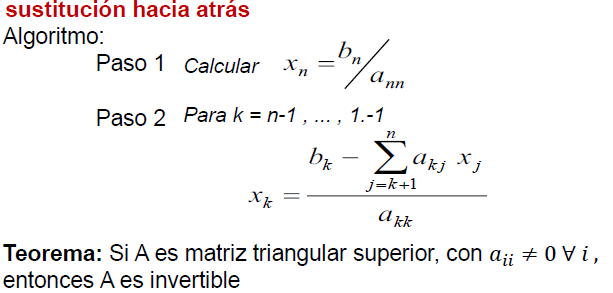

In [ ]:
import numpy as np

def resolver_matriz_triangular_superior(a, b):
    n = len(b)
    x = np.zeros(n)
    
    #sust atras
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.dot(a[i, i+1:], x[i+1:]))/ a[i,i] 
        
    print('sol', x)

# Ejemplo de uso
a = np.array([[2, -1, 3],
              [0,  1, 4],
              [0,  0, 2]])

b = np.array([5, 6, 4])

resolver_matriz_triangular_superior(a, b)

In [ ]:
import numpy as np

def eliminacion_gauss(a, b):
    
    n = len(b)
    
    ab = np.hstack([a,b.reshape(-1,1)])
    
    for i in range(n):
        if(ab[i,i] == 0):
            raise ValueError("pivote 0")
        
        for j in range (i+1, n):
            m = ab[j,i] / ab[i,i]
            ab[j, i:] = ab[j, i:] - m * ab[i,i:]
      
          
    #sust atras
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.dot(a[i, i+1:], x[i+1:]))/ a[i,i]
        
    print('sol', x)
    
a = np.array([[2, -1, 3],
              [0,  1, 4],
              [0,  0, 2]])

b = np.array([5, 6, 4])

eliminacion_gauss(a, b)

In [ ]:
import numpy as np

def factorizacion_LU(A):
    # Obtener el tamaño de la matriz
    n = len(A)
    
    # Crear matrices L y U vacías
    L = np.zeros((n, n))
    U = np.zeros((n, n))
    
    # Factorización LU
    for i in range(n):
        # Elementos de la matriz U
        for k in range(i, n):
            sum_u = sum(L[i][j] * U[j][k] for j in range(i))
            U[i][k] = A[i][k] - sum_u
        
        # Elementos de la matriz L
        for k in range(i, n):
            if i == k:
                L[i][i] = 1  # Diagonal de L son unos
            else:
                sum_l = sum(L[k][j] * U[j][i] for j in range(i))
                L[k][i] = (A[k][i] - sum_l) / U[i][i]
    
    return L, U

# Ejemplo de uso
A = np.array([[2, -1, -2],
              [-4, 6, 3],
              [-4, -2, 8]], dtype=float)

L, a = factorizacion_LU(A)

print("Matriz L:")
print(L)
print("Matriz U:")
print(a)


In [ ]:
import numpy as np

def factorizacion_LU_pivoteo_parcial(A):
    # Obtener el tamaño de la matriz
    n = len(A)
    
    # Crear matrices L, U y el vector de permutación P
    L = np.zeros((n, n))
    U = np.array(A, copy=True, dtype=float)
    P = np.eye(n)

    # Pivoteo parcial y factorización LU
    for i in range(n):
        # Pivoteo parcial: encontrar el índice de la fila con el valor máximo en la columna i
        max_index = np.argmax(abs(U[i:, i])) + i

        # Intercambiar filas en U y actualizar P y L
        if max_index != i:
            U[[i, max_index], :] = U[[max_index, i], :]
            P[[i, max_index], :] = P[[max_index, i], :]
            if i > 0:
                L[[i, max_index], :i] = L[[max_index, i], :i]

        # Elementos de la matriz U y L
        for j in range(i+1, n):
            L[j, i] = U[j, i] / U[i, i]
            U[j, i:] -= L[j, i] * U[i, i:]

    # Completar la diagonal de L con unos
    np.fill_diagonal(L, 1)

    return P, L, U

# Ejemplo de uso
A = np.array([[2, -1, -2],
              [-4, 6, 3],
              [-4, -2, 8]], dtype=float)

P, L, a = factorizacion_LU_pivoteo_parcial(A)

print("Matriz P (Permutación):")
print(P)
print("Matriz L:")
print(L)
print("Matriz U:")
print(a)


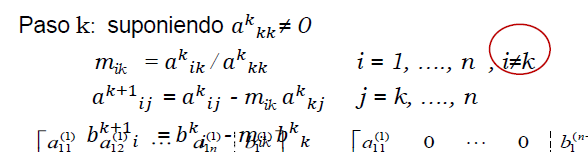

In [ ]:
import numpy as np

def jordan(a, b):
    
    ab = np.hstack([a, b.reshape(-1,1)])
    n = len(b)
    
    for i in range(n):
        # suponiendo aii != 0
        ab[i] = ab[i] / ab[i,i]
        
        for j in range(n):
            if (j != i):
                ab[j] = ab[j] - ab[j, i] * ab[i]
                
    x = ab[:, -1]
    print('sol', x)
    
# ejemplo
a = np.array([[2, -1, -2],
              [-4, 6, 3],
              [-4, -2, 8]], dtype=float)

b = np.array([0, 9, -12], dtype=float)
                
jordan(a, b) 
    

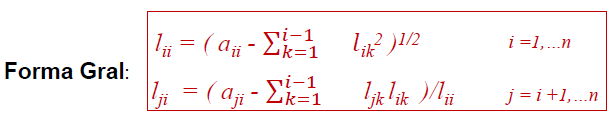

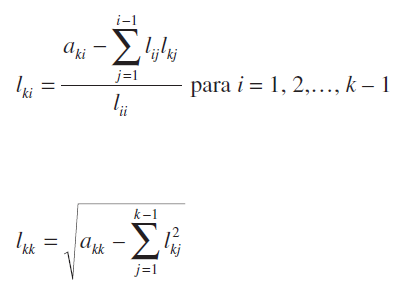

In [4]:
import numpy as np

def cholesky(a):
    n = len(a)
    L = np.zeros_like(a)
    
    for i in range(n):
        # Calcular la diagonal de L
        sum1 = sum(L[i, k]**2 for k in range(i))
        L[i, i] = np.sqrt(a[i, i] - sum1)
        
        # Calcular los elementos fuera de la diagonal
        for j in range(i + 1, n):
            sum2 = sum(L[j, k] * L[i, k] for k in range(i))
            L[j, i] = (a[j, i] - sum2) / L[i, i]
    
    return L

# Ejemplo de uso
A = np.array([[6, 15, 55],
              [15, 55, 225],
              [55, 225, 979]], dtype="float")

L = cholesky(A)
print("Factorización de Cholesky (matriz L):")
print(L)


Factorización de Cholesky (matriz L):
[[ 2.44948974  0.          0.        ]
 [ 6.12372436  4.18330013  0.        ]
 [22.45365598 20.91650066  6.11010093]]


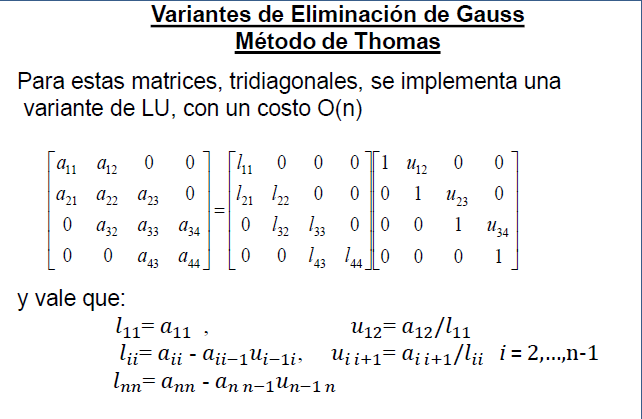

In [ ]:
def thomas(A,b,n):
  #Descomposición
  for k in range(1,n):
    A[k,k-1] = A[k,k-1]/A[k-1,k-1] #e_k
  #Sustición hacia adelante.
    b[k] = b[k] - A[k,k-1] * b[k-1]

  #Sustitución hacia atrás.
  x = np.zeros(n)
  x[n-1] = b[n-1]/A[n-1,n-1]
  for k in range(n-2,-1,-1):
    x[k] = (b[k]-A[k,k+1]*x[k+1])/A[k,k]
  return x

A = np.matrix([[2.04,-1,0,0],
               [-1,2.04,-1,0],
               [0,-1,2.04,-1],
               [0,0,-1,2.04]])
b = np.array([40.8,0.8,0.8,200.8])

x = thomas(A.copy(),b.copy(),4)
print(x)